In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats

In [2]:
data_path = '../../data/tfidf_toprev_conlen_fulldata/'

In [3]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

In [4]:
def bootstrap_resample(li):
    if len(li) > 0:
        ave_original = np.average(li)
        aves = []
        for i in range(1000):
            sample = []
            for i in range(len(li)):
                sample.append(random.choice(li))
            aves.append(np.average(sample))
        tail = sorted(aves)[24]
        head = sorted(aves)[975]
        return (ave_original, tail, head)

## Aggregate

In [5]:
def create_normed_dfs(df):
    
    # Normalize effects of authors by turning kudos into z-score corresponding to works from this author
    # Seems not useful b/c many authors only have 1 work
#     author_list = df.Author.drop_duplicates().tolist()
#     combined = []
#     for author in author_list:
#         df_a = df[df.Author == author]
#         if len(df_a) > 1:
#             df_a['Kudos'] = (df_a['Kudos'] - df_a['Kudos'].mean())/df_a['Kudos'].std(ddof=0)
#             combined.append(df_a)        
#     df = pd.concat(combined)
#     df = df[df.Kudos != 0]

# #     Normalize by creating hits/kudos 
#     df = df[df.Hits != 0]
#     df = df[df.Kudos != 0]
#     df['Kudos/Hits'] = df['Kudos'].astype(float)/df['Hits'].astype(float)
    
#     Normalize by log scale
#     df = df[df.Kudos != 0]
#     df['Kudos'] = np.log(df['Kudos'])
#     df = df[df.Hits != 0]
#     df['Hits'] = np.log(df['Hits'])
#     df['Kudos/Hits'] = df['Kudos'] - df['Hits']

#     # filter 0s
# #     df = df.fillna(0)"

#     # turn into z scores
    df['Kudos'] = df['Kudos']/df['Chapters']
    df = df.dropna(subset=['Kudos'])
    df = df[np.isfinite(df['Kudos'])]
    df['Kudos'] = (df['Kudos'] - df['Kudos'].mean())/df['Kudos'].std(ddof=0)
    
    df = df.dropna(subset=['Comments'])
    df = df[np.isfinite(df['Comments'])]
    df['Comments'] = (df['Comments'] - df['Comments'].mean())/df['Comments'].std(ddof=0)

    return df

In [6]:
def create_dict(df, field, binsize):
    
    # Make bins
    df.Cos = df.Cos.astype(float)
    min_cos = min(df.Cos.tolist())
    max_cos = max(df.Cos.tolist())
    dic = {}
    for i in np.arange(min_cos, max_cos, binsize):
        df_s = df[(df.Cos >= i) & (df.Cos < i+binsize)]
#         if len(df_s) > 9:
#             print (min_cos, max_cos)
#             print(df_s[field].tolist())
        li = df_s[field].tolist()
        if len(li) > 0:
            dic[i] = bootstrap_resample(li)
    return dic

In [7]:
def plot_agg(flist, title):
    df_all = []
    for i,fandom in enumerate(flist):
        df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
        df = create_normed_dfs(df)
        df = df[['Cos', 'Comments']].dropna()
        df_all.append(df)
        
    df = pd.concat(df_all)

    dic = create_dict(df, 'Comments', 0.1)
    x = sorted(dic.keys())
    y = [dic[j][0] for j in x]
    
    print(dic)
    
    #     Make error bars
    lower_error = [dic[j][0]-dic[j][1] for j in x]
    upper_error = [dic[j][2]-dic[j][0] for j in x]
    asymmetric_error = [lower_error, upper_error]



    plt.errorbar(x, y, yerr=asymmetric_error,fmt='o')
    plt.scatter(x, y)
    plt.xlabel('Novelty',fontsize=15)
    plt.ylabel('Comments (z-score)',fontsize=15)

    plt.errorbar(x, y, yerr=asymmetric_error,fmt='o')
    plt.scatter(x, y)
    plt.title(title)
    

54544


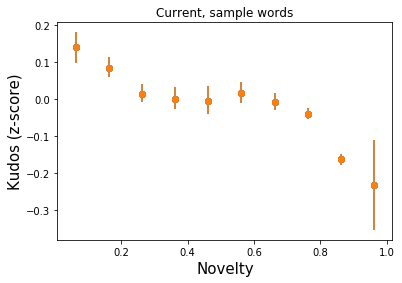

In [65]:
plot_agg(fandom_list, 'Current, sample words')

55982


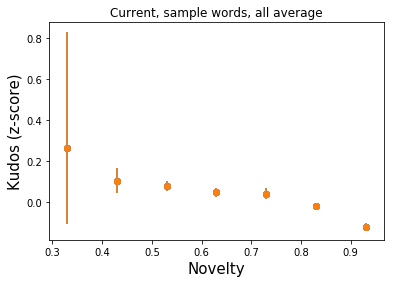

In [68]:
plot_agg(fandom_list, 'Current, sample words, all average')

60893


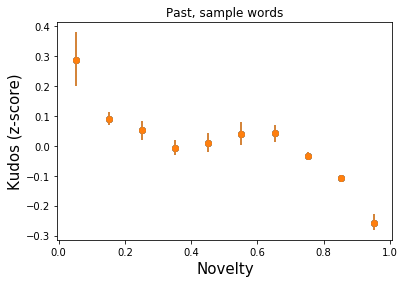

In [71]:
plot_agg(fandom_list, 'Past, sample words')

60895


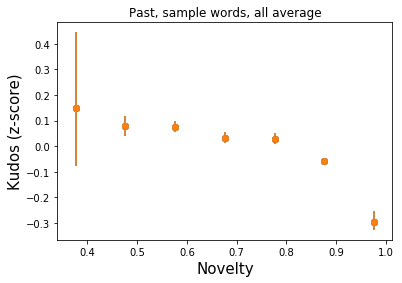

In [75]:
plot_agg(fandom_list, 'Past, sample words, all average')

45917


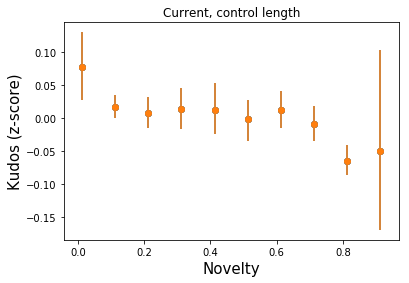

In [78]:
plot_agg(fandom_list, 'Current, control length')

41016


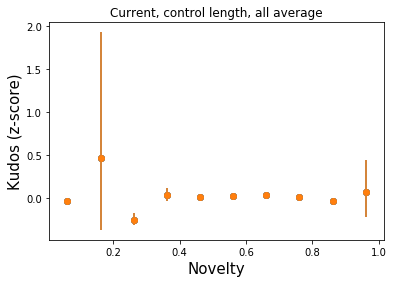

In [81]:
plot_agg(fandom_list, 'Current, control length, all average')

247718


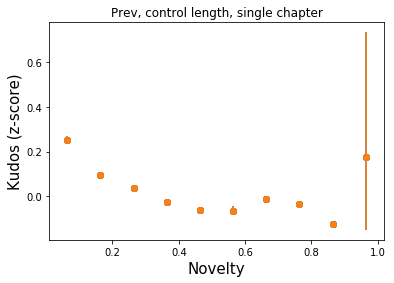

In [8]:
plot_agg(fandom_list, 'Prev, control length, single chapter')

{0.06490142690992562: (0.159528635252766, 0.1498569709474765, 0.16900617610759935), 0.16490142690992562: (0.07329942992266188, 0.06774130691027253, 0.07913729033280667), 0.26490142690992563: (0.022509134398871217, 0.016047340022474682, 0.02919907852091504), 0.36490142690992566: (-0.0035184818319143937, -0.01108090712714897, 0.003526753396293223), 0.46490142690992564: (-0.026552875246751116, -0.03574808705246396, -0.016861046539166345), 0.5649014269099256: (-0.030531661104042974, -0.03979672493980766, -0.020258753294973657), 0.6649014269099257: (-0.02466947655489593, -0.032994043456171206, -0.016309474359067665), 0.7649014269099257: (-0.02963390923985762, -0.034743814934065226, -0.024570241397425703), 0.8649014269099257: (-0.08589811497527373, -0.09110592635390542, -0.08080157335282526), 0.9649014269099256: (-0.045267314473184404, -0.08769954814935736, -0.003448102062666935)}


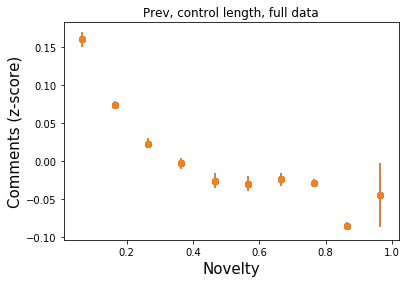

In [32]:
plot_agg(fandom_list, 'Prev, control length, full data')

In [33]:
dic1 = {0.06490142690992562: (0.159528635252766, 0.1498569709474765, 0.16900617610759935), 0.16490142690992562: (0.07329942992266188, 0.06774130691027253, 0.07913729033280667), 0.26490142690992563: (0.022509134398871217, 0.016047340022474682, 0.02919907852091504), 0.36490142690992566: (-0.0035184818319143937, -0.01108090712714897, 0.003526753396293223), 0.46490142690992564: (-0.026552875246751116, -0.03574808705246396, -0.016861046539166345), 0.5649014269099256: (-0.030531661104042974, -0.03979672493980766, -0.020258753294973657), 0.6649014269099257: (-0.02466947655489593, -0.032994043456171206, -0.016309474359067665), 0.7649014269099257: (-0.02963390923985762, -0.034743814934065226, -0.024570241397425703), 0.8649014269099257: (-0.08589811497527373, -0.09110592635390542, -0.08080157335282526), 0.9649014269099256: (-0.045267314473184404, -0.08769954814935736, -0.003448102062666935)}

In [34]:
dic2 = {0.3082585991310225: (0.15111608993260797, 0.06811349369823401, 0.23568747815712046), 0.40825859913102247: (0.13513899889681757, 0.12429566654429952, 0.14645366391183426), 0.5082585991310224: (0.025804534996797707, 0.022067871258151475, 0.029454527383508435), 0.6082585991310224: (-0.04168856263006985, -0.04476798720842397, -0.037801575716507864)}

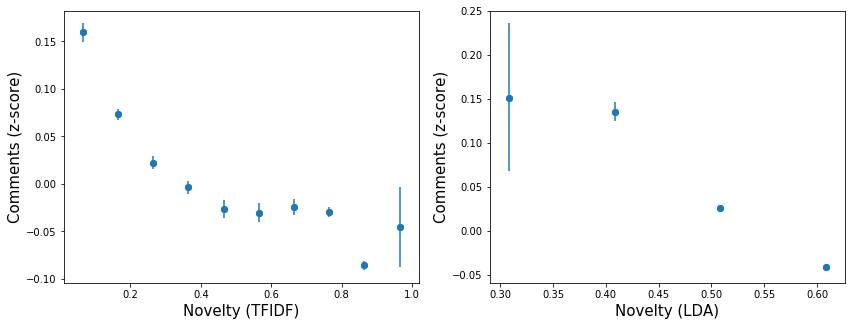

In [36]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)

x1 = sorted(dic1.keys())
y1 = [dic1[j][0] for j in x1]

lower_error = [dic1[j][0]-dic1[j][1] for j in x1]
upper_error = [dic1[j][2]-dic1[j][0] for j in x1]
asymmetric_error = [lower_error, upper_error]

plt.errorbar(x1, y1, yerr=asymmetric_error,fmt='o')
plt.scatter(x1, y1)
plt.xlabel('Novelty (TFIDF)',fontsize=15)
plt.ylabel('Comments (z-score)',fontsize=15)

plt.subplot(1, 2, 2)

x2 = sorted(dic2.keys())
y2 = [dic2[j][0] for j in x2]

lower_error = [dic2[j][0]-dic2[j][1] for j in x2]
upper_error = [dic2[j][2]-dic2[j][0] for j in x2]
asymmetric_error = [lower_error, upper_error]

plt.errorbar(x2, y2, yerr=asymmetric_error,fmt='o')
plt.scatter(x2, y2)
plt.xlabel('Novelty (LDA)',fontsize=15)
plt.ylabel('Comments (z-score)',fontsize=15)

plt.savefig('novelty_comments_tfidf_lda.pdf', type='pdf')

